# Import libraries & data


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [60]:
data =pd.read_csv('/content/Telco_Customer_Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [63]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [64]:
data.duplicated().sum()

np.int64(0)

# Data Cleaning & Preprocessing

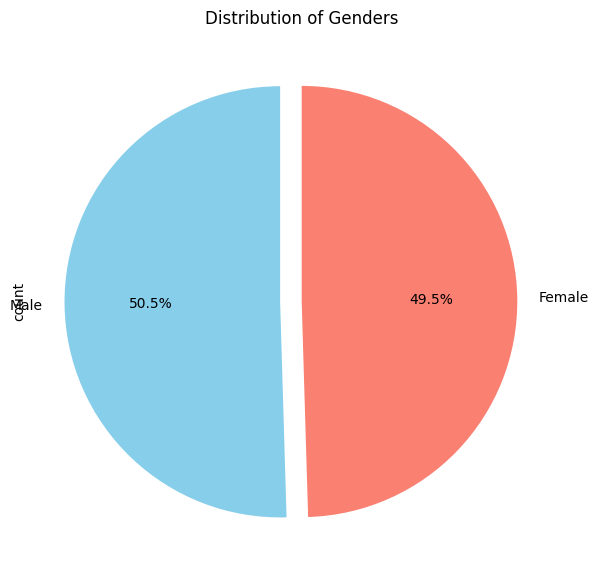

In [65]:
import matplotlib.pyplot as plt

gender_counts = data['gender'].value_counts()

plt.figure(figsize=(7, 7))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, explode=(0.1, 0))
plt.title('Distribution of Genders')
plt.show()


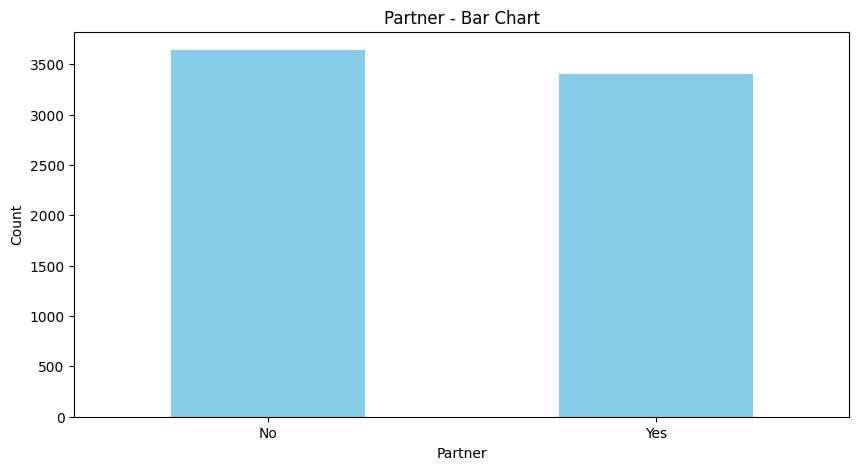

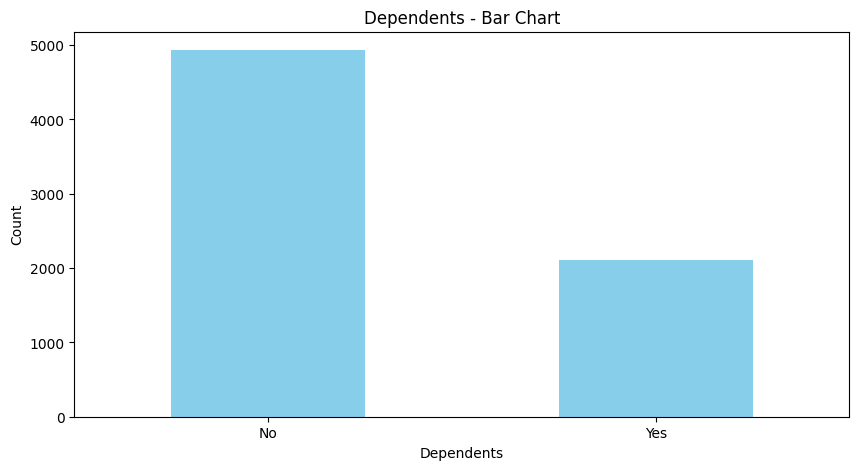

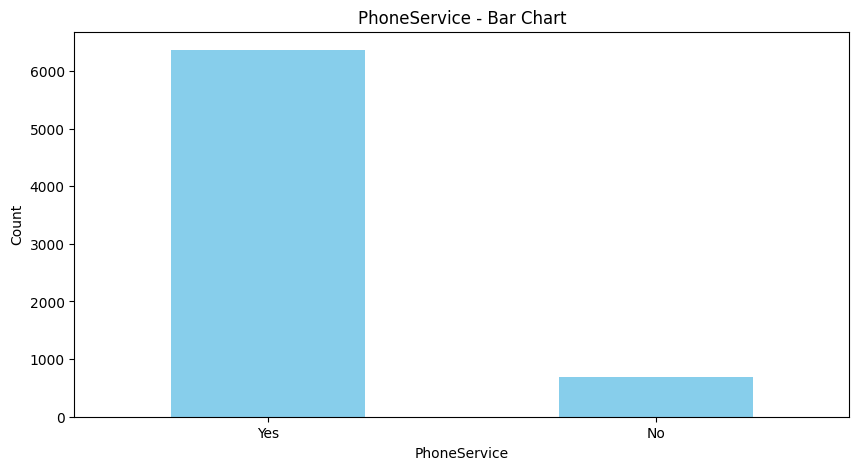

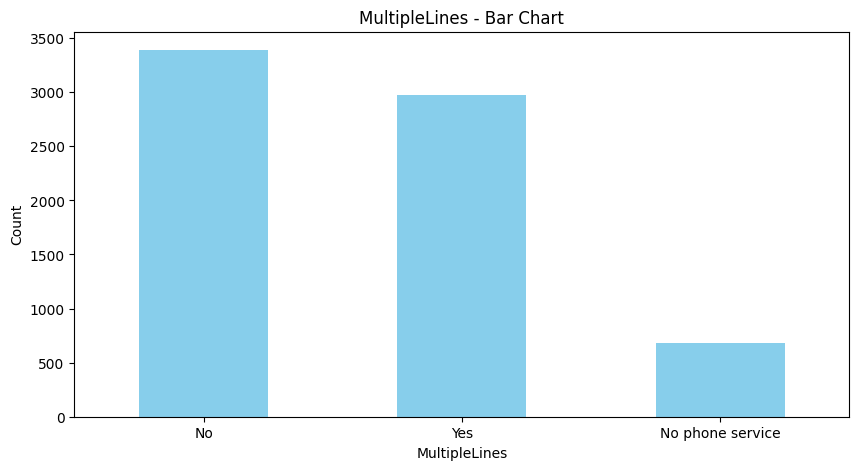

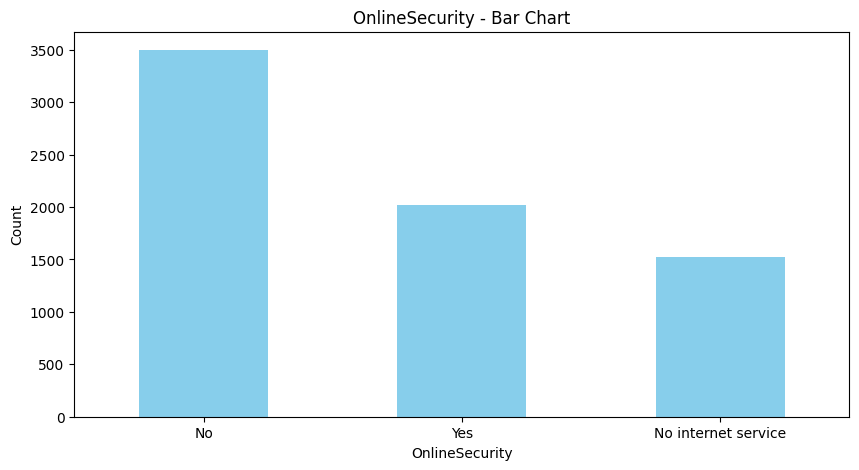

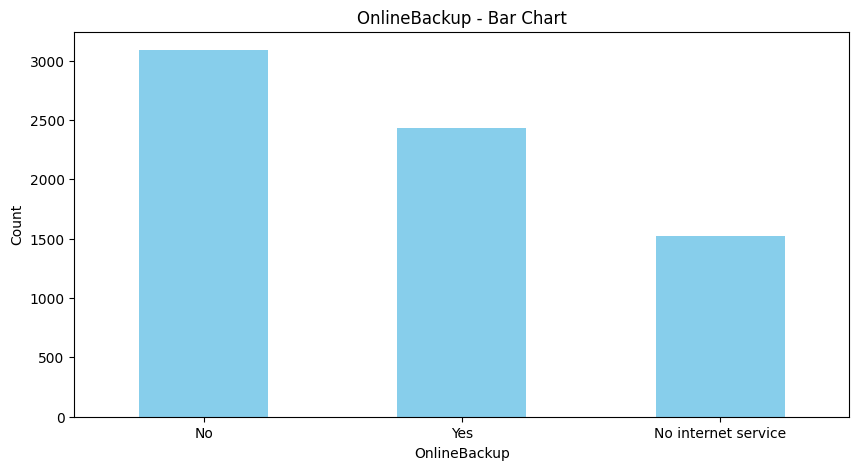

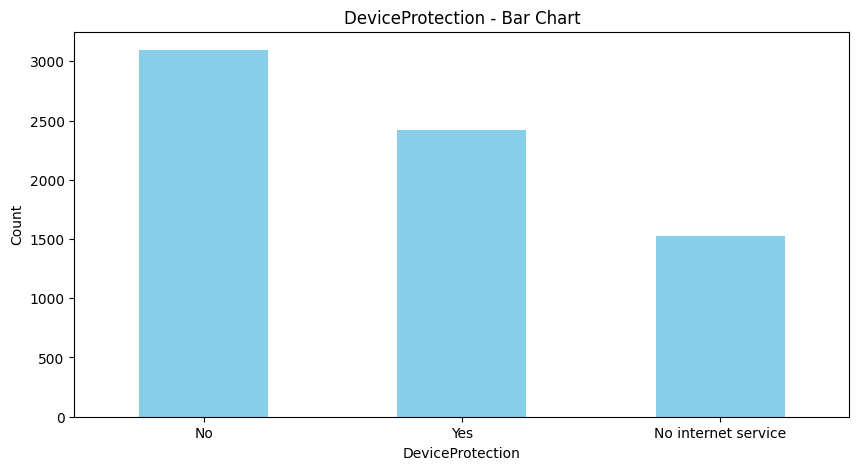

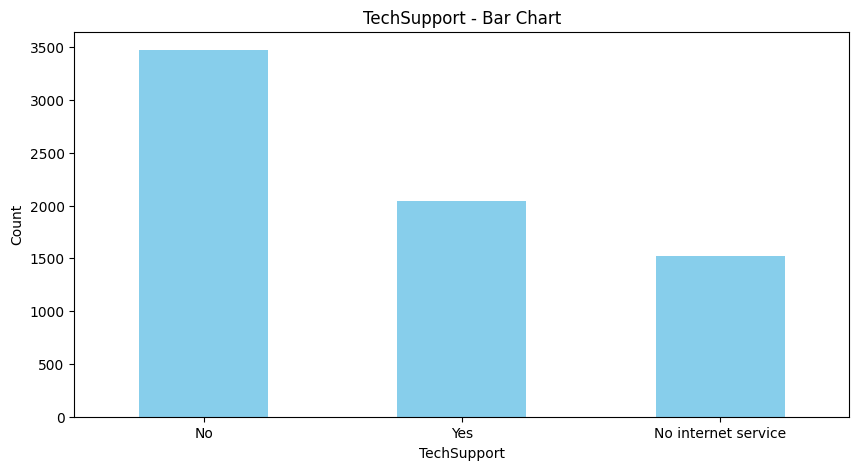

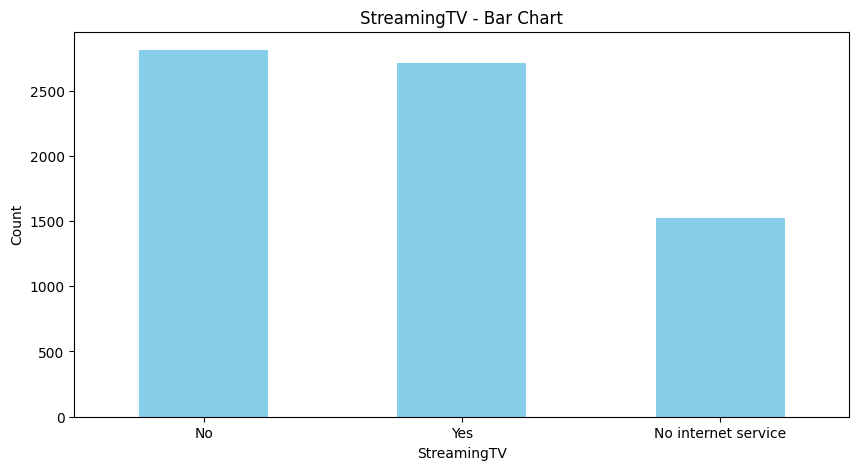

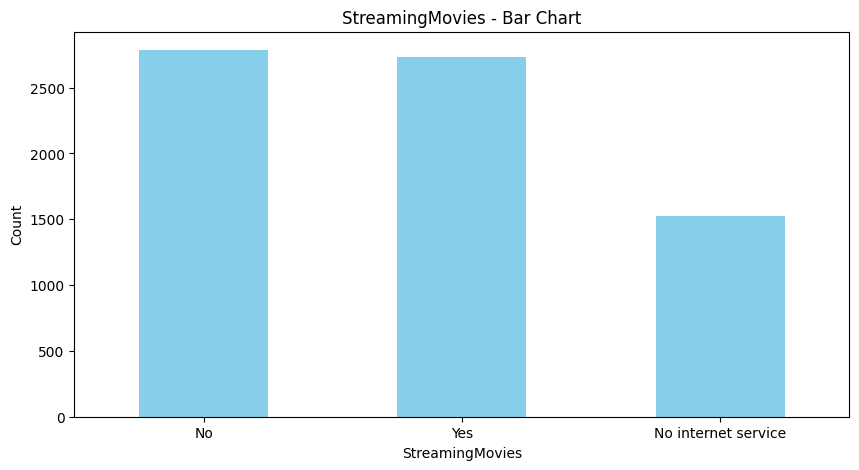

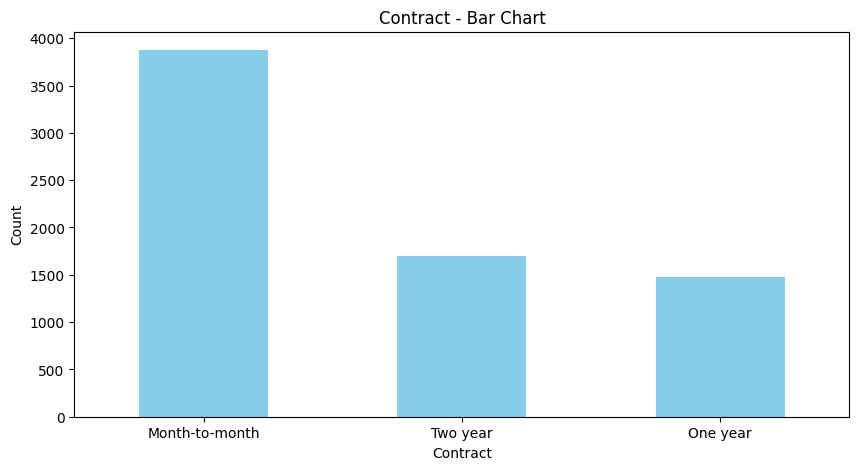

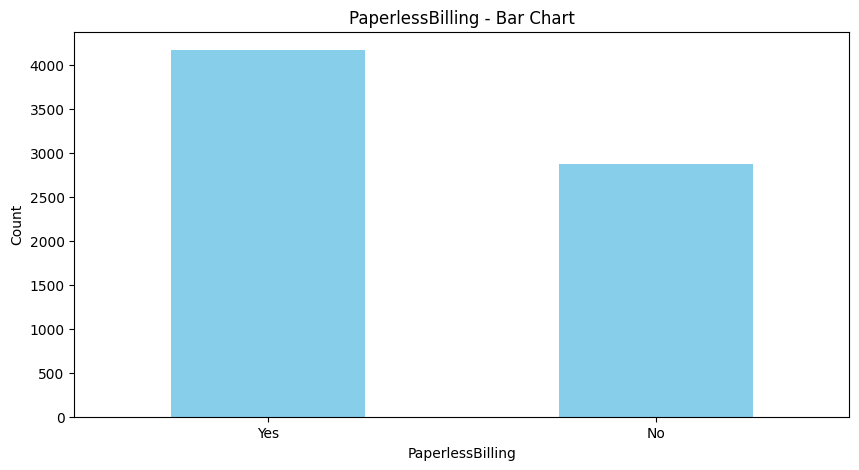

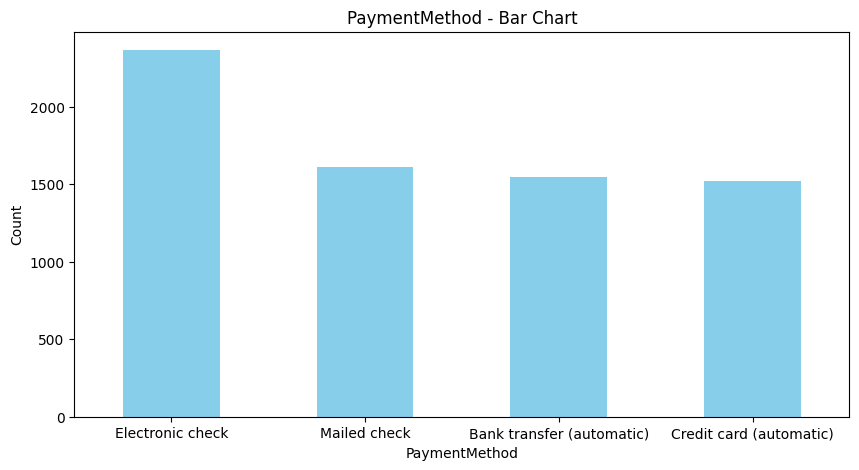

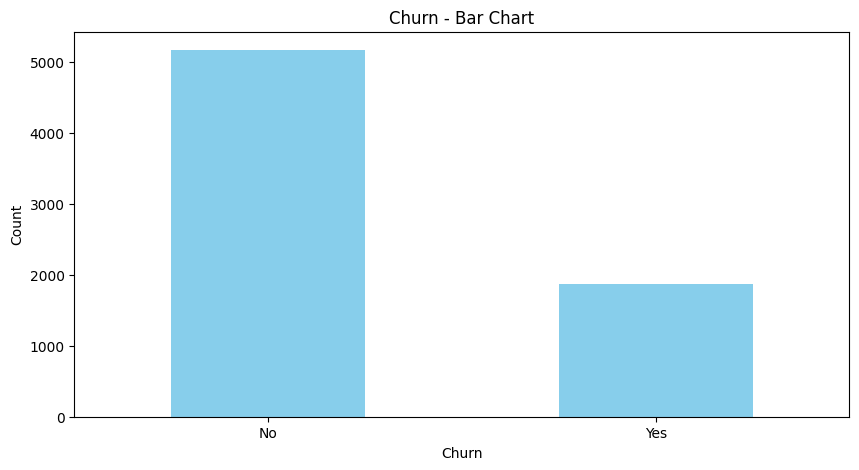

In [66]:
columns = [ "Partner", "Dependents", "PhoneService", "MultipleLines",
           "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
           "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
           "PaymentMethod", "Churn"]

for col in columns:
    plt.figure(figsize=(10, 5))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{col} - Bar Chart')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [67]:
data.drop('customerID',axis=1,inplace=True)

In [68]:
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].unique())
    print("----------------")


Column: gender
['Female' 'Male']
----------------
Column: SeniorCitizen
[0 1]
----------------
Column: Partner
['Yes' 'No']
----------------
Column: Dependents
['No' 'Yes']
----------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------
Column: PhoneService
['No' 'Yes']
----------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
----------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
----------------
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------
Column: OnlineBackup
['Yes' 'No' 'No internet service']
----------------
Column: DeviceProtection
['No' 'Yes' 'No internet service']
----------------
Column: TechSupport
['No' 'Yes' 'No internet service']
----------------
Column: StreamingTV
['No' 'Yes' 'No internet service']
------------

In [69]:
data['gender'] = data['gender'].replace({
    "Female": 1,
    "Male": 2
})


# List of columns to convert
columns_to_replace = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

# Replace 'Yes' with 1 and 'No' with 0 in specified columns
data[columns_to_replace] = data[columns_to_replace].replace({
    "No": 0,
    "Yes": 1
})
for col in columns_to_replace:
    print(f"{col} value_counts:\n", data[col].value_counts())
    print("----------------")


# Replace values in the 'MultipleLines' column
data['MultipleLines'] = data['MultipleLines'].replace({
    "No phone service": 1,
    "No": 2,
    "Yes": 3
})

# Replace values in the 'InternetService' column
data['InternetService'] = data['InternetService'].replace({
    "DSL": 1,
    "Fiber optic": 2,
    "No": 3
})

# Verify the changes
print("MultipleLines value_counts:\n", data['MultipleLines'].value_counts())
print("----------------")

print("InternetService value_counts:\n", data['InternetService'].value_counts())
print("----------------")


# List of columns to replace values
columns_to_replace = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

# Replace values: "Yes" → 1, "No" → 0, "No internet service" → 2
data[columns_to_replace] = data[columns_to_replace].replace({
    "Yes": 1,
    "No": 0,
    "No internet service": 2
})

# Loop to print value counts for verification
for col in columns_to_replace:
    print(f"{col} value_counts:\n", data[col].value_counts())
    print("-----------------")



# Replace values in 'Contract' column
data['Contract'] = data['Contract'].replace({
    "Month-to-month": 1,
    "One year": 2,
    "Two year": 3
})

# Replace values in 'PaymentMethod' column
data['PaymentMethod'] = data['PaymentMethod'].replace({
    "Electronic check": 1,
    "Mailed check": 2,
    "Bank transfer (automatic)": 3,
    "Credit card (automatic)": 4
})

# Verify the changes
print("Contract value_counts:\n", data['Contract'].value_counts())
print("------------------")
print("PaymentMethod value_counts:\n", data['PaymentMethod'].value_counts())
print("------------------")



Partner value_counts:
 Partner
0    3641
1    3402
Name: count, dtype: int64
----------------
Dependents value_counts:
 Dependents
0    4933
1    2110
Name: count, dtype: int64
----------------
PhoneService value_counts:
 PhoneService
1    6361
0     682
Name: count, dtype: int64
----------------
PaperlessBilling value_counts:
 PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64
----------------
Churn value_counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64
----------------
MultipleLines value_counts:
 MultipleLines
2    3390
3    2971
1     682
Name: count, dtype: int64
----------------
InternetService value_counts:
 InternetService
2    3096
1    2421
3    1526
Name: count, dtype: int64
----------------
OnlineSecurity value_counts:
 OnlineSecurity
0    3498
1    2019
2    1526
Name: count, dtype: int64
-----------------
OnlineBackup value_counts:
 OnlineBackup
0    3088
1    2429
2    1526
Name: count, dtype: int64
-----------------
DeviceProtection value_counts:

In [70]:
data["TotalCharges"].unique()
print("----------------")


# Convert 'TotalCharges' column to numeric, setting errors='coerce' to handle non-numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Verify the changes
print(data['TotalCharges'].dtype)  # Should print 'float64'
print(data['TotalCharges'].head(20))  # Print first few values to check


----------------
float64
0       29.85
1     1889.50
2      108.15
3     1840.75
4      151.65
5      820.50
6     1949.40
7      301.90
8     3046.05
9     3487.95
10     587.45
11     326.80
12    5681.10
13    5036.30
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19    1862.90
Name: TotalCharges, dtype: float64


In [71]:
data.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [72]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,1.504756,0.162147,0.483033,0.299588,32.371149,0.903166,2.325004,1.872923,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,1.690473,0.592219,2.315633,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.737796,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.771362,0.441561
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,18.250000,18.800000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,29.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,2.000000,0.000000,1.000000,1.000000,55.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,89.850000,3794.737500,1.000000
max,2.000000,1.000000,1.000000,1.000000,72.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,4.000000,118.750000,8684.800000,1.000000


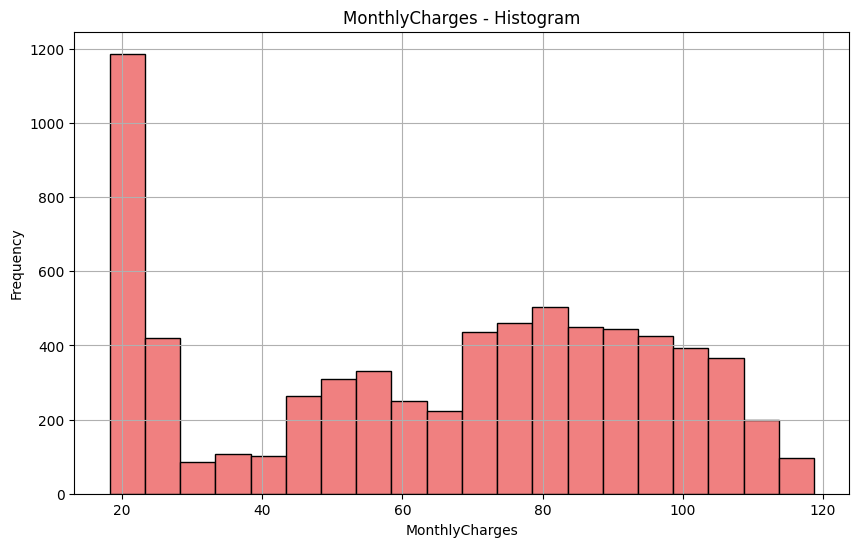

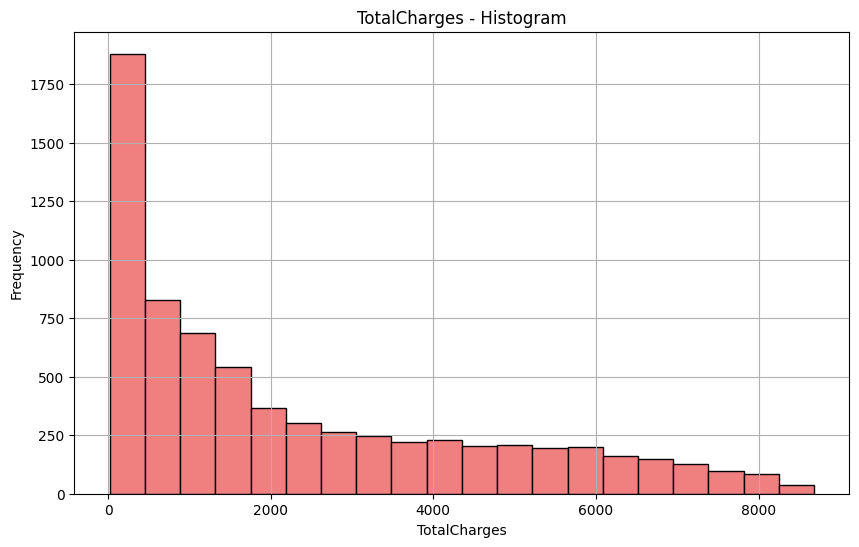

In [73]:
import matplotlib.pyplot as plt

numerical_columns = [ "MonthlyCharges", "TotalCharges"]

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    data[col].hist(bins=20, color='lightcoral', edgecolor='black')
    plt.title(f'{col} - Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Build Models

In [74]:
# Split data into features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

In [ ]:

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
}

# Initialize GridSearchCV with RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, refit=True, verbose=1, cv=5)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model after the grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
